### A fast implementation to model the change in Forex account balance

Input: 
- list of pips gains from trades as an array
- percentage of risk on a trade
- account balance

ToDo:
- leverage (currently it's 1:100)
- changing risk

In [24]:
import numpy as np
import pandas

In [2]:
def model1(balance, risk, trades):
    N = balance
    history = np.zeros(len(trades)+1)
    history[0] = N
    for j,i in enumerate(trades):
        N += N*risk*i/100
        history[j+1] = N
    return(N,history)


In [3]:
model1(100,0.1,(100,10,0))


(111.1, array([100. , 110. , 111.1, 111.1]))

In [5]:
df = pandas.read_csv('quotes.csv', decimal=",")


In [25]:
trades = df['pips'].tolist()

In [28]:
trades = [float(i) for i in trades]

In [6]:
df1 = pandas.read_csv('quotes1.csv',delimiter=";", decimal=",", )
df1 = df1.fillna(0)

In [7]:
trades1 = [float(i) for i in df1['pips1'].tolist()]
trades2 = [float(i) for i in df1['pips2'].tolist()]
trades3 = [float(i) for i in df1['pips3'].tolist()]

In [8]:
model1(100,0.1,trades1)

(104.92385021720615,
 array([100.        , 101.23      , 101.675412  , 101.72624971,
        101.79745808, 102.26572639, 102.71569558, 102.02750042,
        102.22135267, 102.548461  , 102.76381277, 103.21597355,
        104.03137974, 104.17702367, 103.29151897, 103.4774437 ,
        103.4774437 , 103.5705734 , 103.99521275, 104.36959552,
        104.39046944, 104.5366161 , 104.73523567, 104.8399709 ,
        104.8504549 , 104.92385022, 104.92385022, 104.92385022,
        104.92385022, 104.92385022, 104.92385022, 104.92385022,
        104.92385022, 104.92385022, 104.92385022, 104.92385022,
        104.92385022, 104.92385022, 104.92385022, 104.92385022,
        104.92385022, 104.92385022, 104.92385022, 104.92385022,
        104.92385022, 104.92385022, 104.92385022, 104.92385022,
        104.92385022, 104.92385022, 104.92385022, 104.92385022,
        104.92385022, 104.92385022, 104.92385022, 104.92385022,
        104.92385022, 104.92385022, 104.92385022, 104.92385022,
        104.9238502

In [9]:
model1(100,0.1,trades2)

(104.69858476023418,
 array([100.        ,  98.43      ,  97.071666  ,  95.95534184,
         94.87104648,  94.18797494,  93.57575311,  93.20145009,
         92.92184574,  92.84750827,  92.83822352,  94.86209679,
         98.41942542, 104.69858476, 104.69858476, 104.69858476,
        104.69858476, 104.69858476, 104.69858476, 104.69858476,
        104.69858476, 104.69858476, 104.69858476, 104.69858476,
        104.69858476, 104.69858476, 104.69858476, 104.69858476,
        104.69858476, 104.69858476, 104.69858476, 104.69858476,
        104.69858476, 104.69858476, 104.69858476, 104.69858476,
        104.69858476, 104.69858476, 104.69858476, 104.69858476,
        104.69858476, 104.69858476, 104.69858476, 104.69858476,
        104.69858476, 104.69858476, 104.69858476, 104.69858476,
        104.69858476, 104.69858476, 104.69858476, 104.69858476,
        104.69858476, 104.69858476, 104.69858476, 104.69858476,
        104.69858476, 104.69858476, 104.69858476, 104.69858476,
        104.6985847

In [11]:
hist3 = model1(100,0.1,trades3)[1]

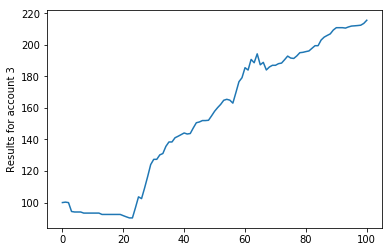

In [22]:
import matplotlib.pyplot as plt
plt.plot(hist3)
plt.ylabel('Results for account 3')
plt.show()

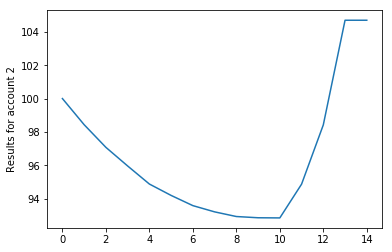

In [20]:
hist2 = model1(100,0.1,trades2)[1]
plt.plot(hist2[:15])
plt.ylabel('Results for account 2')
plt.show()

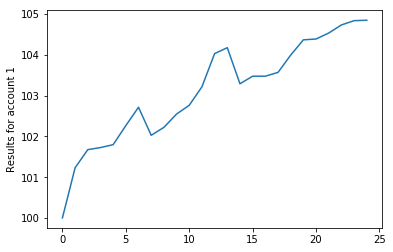

In [21]:
hist1 = model1(100,0.1,trades1)[1]
plt.plot(hist1[:25])
plt.ylabel('Results for account 1')
plt.show()